In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import warnings
import os
import sys
import datetime as dt
import cartopy.crs as ccrs
#from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import matplotlib as mpl

import matplotlib.ticker as mticker
#warnings.filterwarnings("ignore", category=RuntimeWarning) # ignore runtime warnings; here they arise from attempted operations on all-NaN arrays

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy12MHW/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
nl = dict(zip( ['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 'NASA-GEOSS2S', 'NCEP-CFSv2', 'CanESM5', 'GEM5.2-NEMO', 'GEM5-NEMO', 'CanCM4i-IC3',],
               [       11,                 11,         11,           11,              8,            9,        11,            11,          11,            11,])) 
modict={'Jacox':['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 
                        'NASA-GEOSS2S', 'NCEP-CFSv2'],
        'CanSIPSv2':['CanCM4i','GEM-NEMO'],
        'CanSIPSv21':['CanCM4i-IC3','GEM5-NEMO'],
        'CanSIPSv3':['CanESM5','GEM5.2-NEMO'],
        'GFDLNASA':[ 'GFDL-SPEAR','NASA-GEOSS2S'],}

In [3]:
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW'
clim_years = [1991, 2020]
years=clim_years
mhwdir = basepath+'/mhw/detrended';


In [4]:
dfAlist=[pd.read_csv(f'figs/dfA_NPac_y{yy}.csv',index_col=0) for yy in range(years[0],years[-1]+1)]
dfA=pd.concat(dfAlist,ignore_index=True)
dfA

,year,month,A1_obs,A2_obs,A1_lag0_weighted,A2_lag0_weighted,A1_lag0_gt1,A2_lag0_gt1,A1_lag0_gt5,A2_lag0_gt5,...,A1_lag8_gt21,A2_lag8_gt21,A1_lag8_gt25,A2_lag8_gt25,A1_lag8_gt29,A2_lag8_gt29,A1_lag8_gt33,A2_lag8_gt33,A1_lag8_gt37,A2_lag8_gt37
0,1991,1,300381.283004,0.000000,242986.092281,0.000000,4.514159e+05,0.000000,3.707291e+05,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,2,302531.946301,0.000000,187180.571791,0.000000,5.309226e+05,0.000000,3.441133e+05,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,3,347632.371698,0.000000,433514.794772,0.000000,9.503919e+05,0.000000,7.284284e+05,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991,4,89340.291560,0.000000,139026.647336,0.000000,8.818925e+05,0.000000,3.290124e+05,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991,5,8448.384265,0.000000,74211.579020,8877.247153,1.352773e+06,177872.433134,1.383612e+05,7962.653645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2020,8,244314.997731,23721.133204,122507.585467,5606.737997,1.325451e+06,32179.419035,3.223166e+05,24052.363162,...,85568.630026,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,2020,9,756386.068125,214728.069403,573086.914032,74015.805175,1.700073e+06,467260.853240,1.208792e+06,290198.818407,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,2020,10,454574.123839,137960.841674,606509.128776,249104.369512,1.884421e+06,504012.682709,1.178594e+06,404887.432527,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,2020,11,280090.059971,15925.307289,350190.984960,15044.486540,1.174924e+06,171943.633903,8.875011e+05,66466.212104,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
cmap = mpl.colormaps['jet']
colors = cmap(np.linspace(0, 1, 40))
styles=['-','--','-.',':']
dates=np.array([dt.datetime(yy,mm,15) for ind,(yy,mm) in dfA[['year','month']].iterrows()])

In [6]:
dfA.year.min()

np.int64(1991)

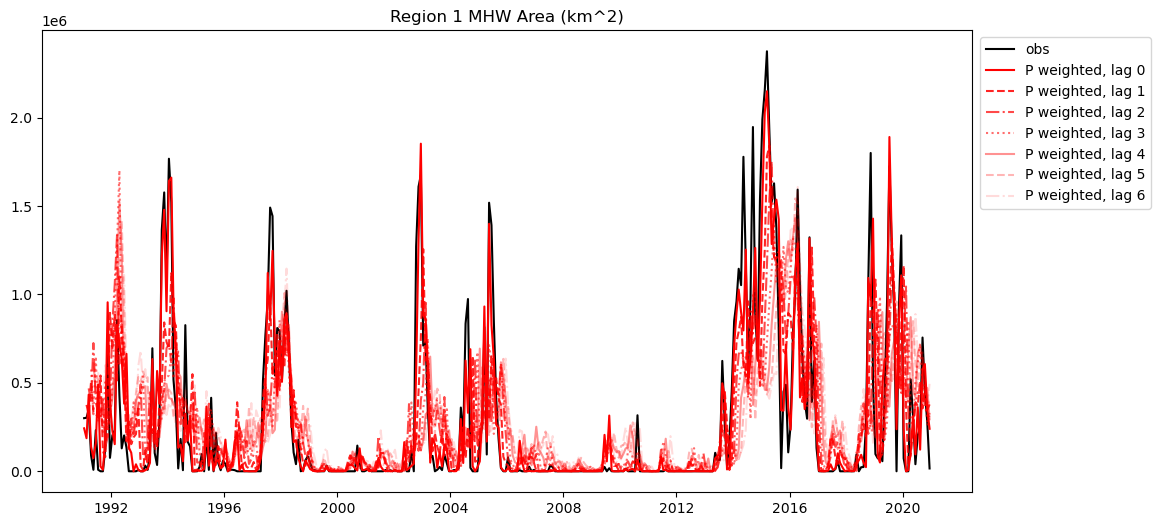

In [7]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.plot(dates,dfA.A1_obs,'k-',label='obs')
for il in range(0,7):
    ax.plot(dates,dfA[f'A1_lag{il}_weighted'],'r',linestyle=styles[il%len(styles)],alpha=1-il/7,label=f'P weighted, lag {il}')
ax.set_title('Region 1 MHW Area (km^2)')
ax.legend(loc=1,bbox_to_anchor=[1.2,1])
fig.savefig('figs/MHWArea_NPacRegion1_weighted.png',bbox_inches='tight')

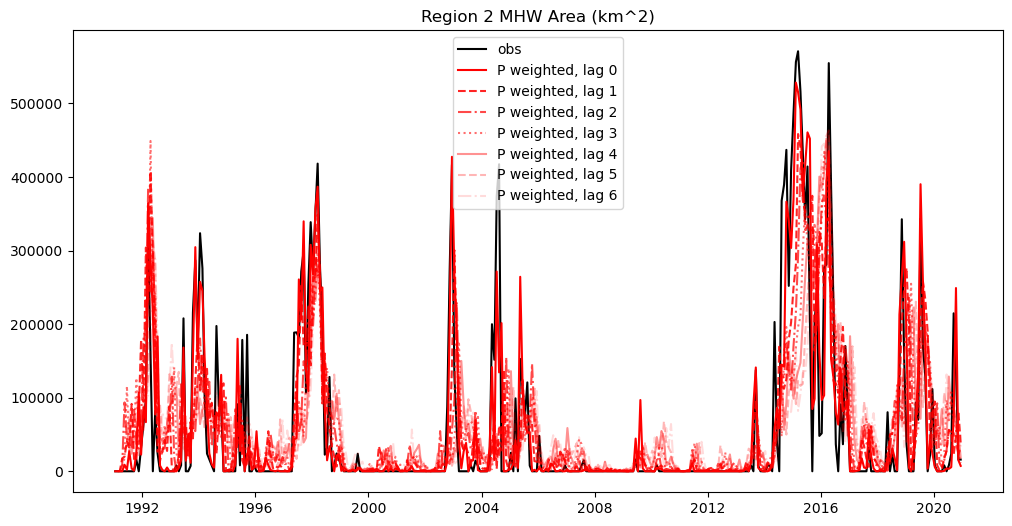

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.plot(dates,dfA.A2_obs,'k-',label='obs')
for il in range(0,7):
    ax.plot(dates,dfA[f'A2_lag{il}_weighted'],'r',linestyle=styles[il%len(styles)],alpha=1-il/7,label=f'P weighted, lag {il}')
ax.set_title('Region 2 MHW Area (km^2)')
ax.legend()
fig.savefig('figs/MHWArea_NPacRegion2_weighted.png',bbox_inches='tight')

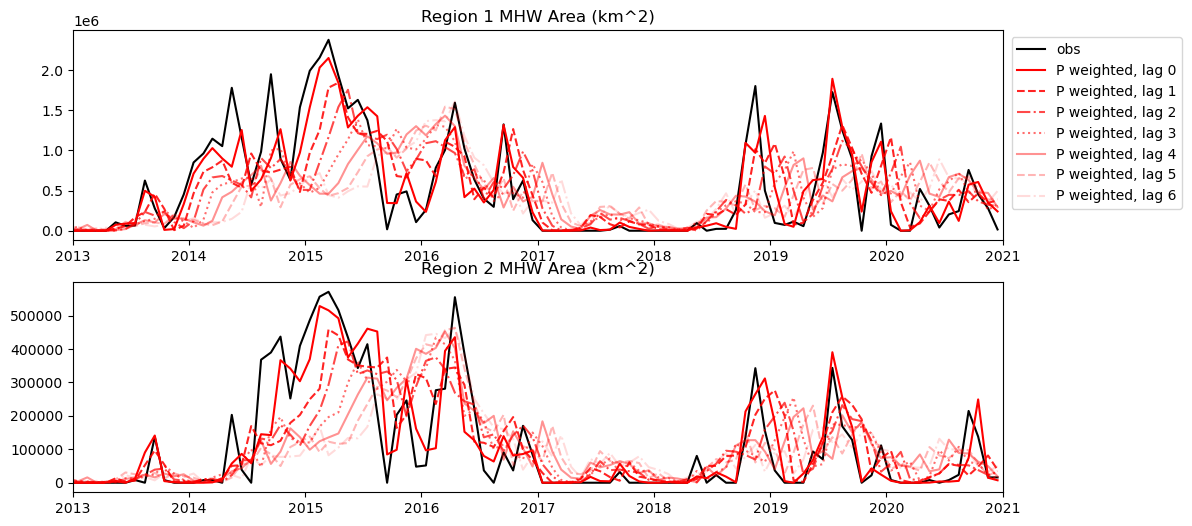

In [9]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
ax=axs[0]
ax.plot(dates,dfA.A1_obs,'k-',label='obs')
for il in range(0,7):
    ax.plot(dates,dfA[f'A1_lag{il}_weighted'],'r',linestyle=styles[il%len(styles)],alpha=1-il/7,label=f'P weighted, lag {il}')
ax.set_title('Region 1 MHW Area (km^2)')
ax.legend(loc=1,bbox_to_anchor=[1.2,1])
ax=axs[1]
ax.plot(dates,dfA.A2_obs,'k-',label='obs')
for il in range(0,7):
    ax.plot(dates,dfA[f'A2_lag{il}_weighted'],'r',linestyle=styles[il%len(styles)],alpha=1-il/7,label=f'P weighted, lag {il}')
ax.set_title('Region 2 MHW Area (km^2)')
#ax.legend()
for iax in axs:
    iax.set_xlim((dt.datetime(2013,1,1),dt.datetime(2021,1,1)))
fig.savefig('figs/MHWArea_NPacRegion1and2_weighted.png',bbox_inches='tight')

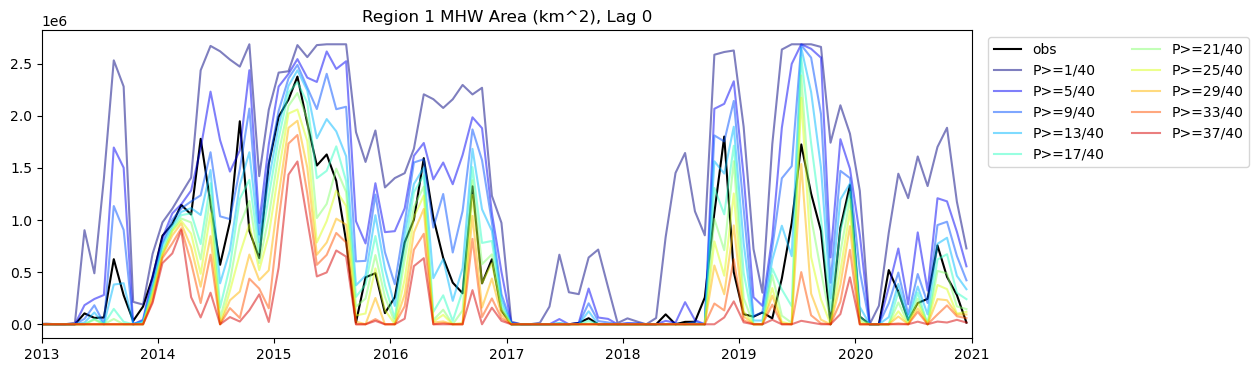

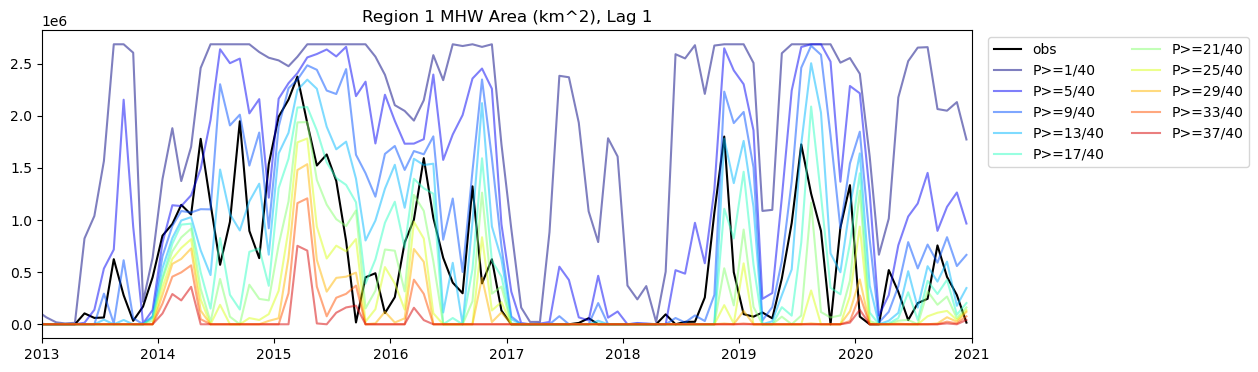

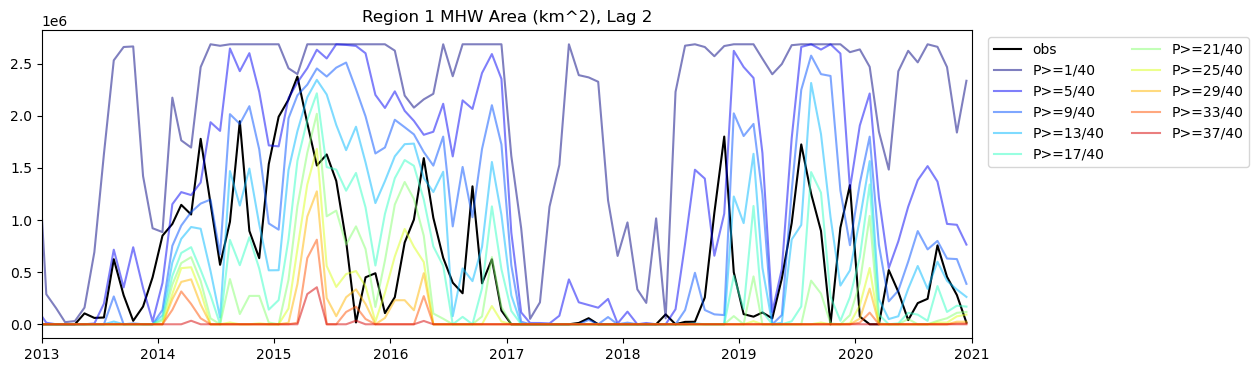

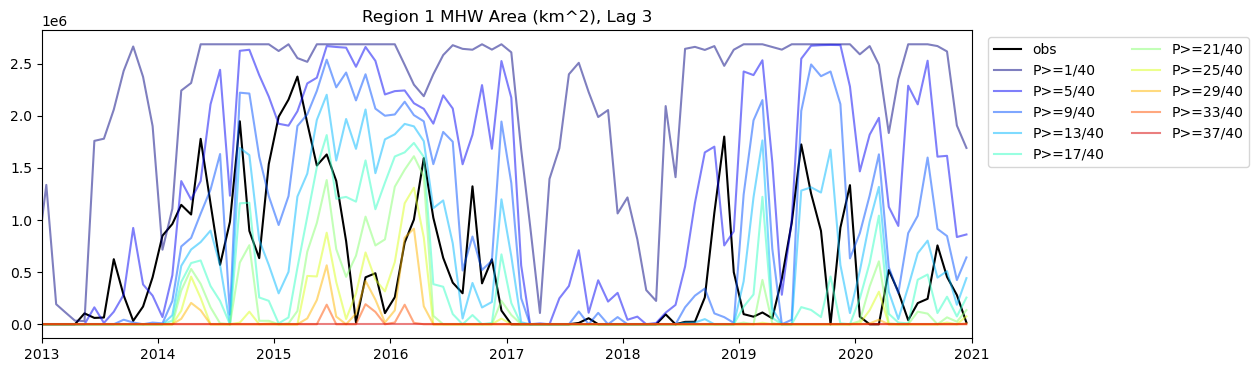

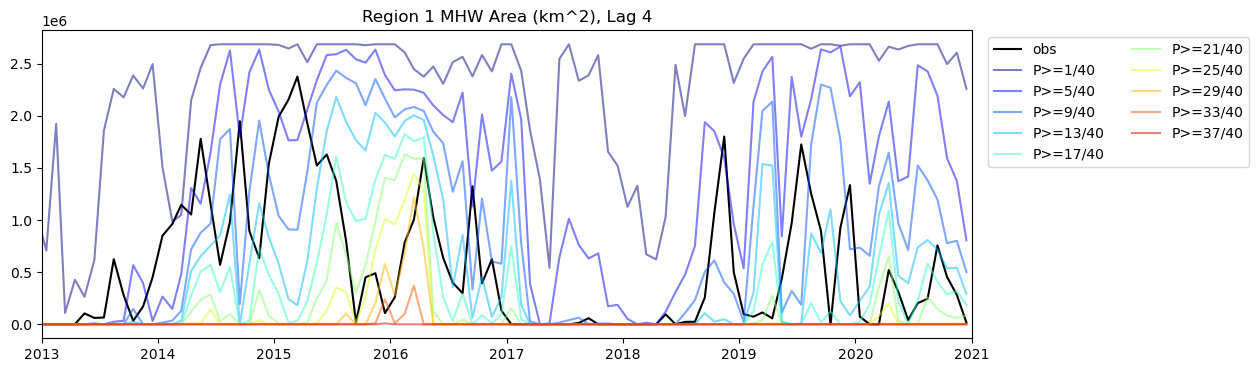

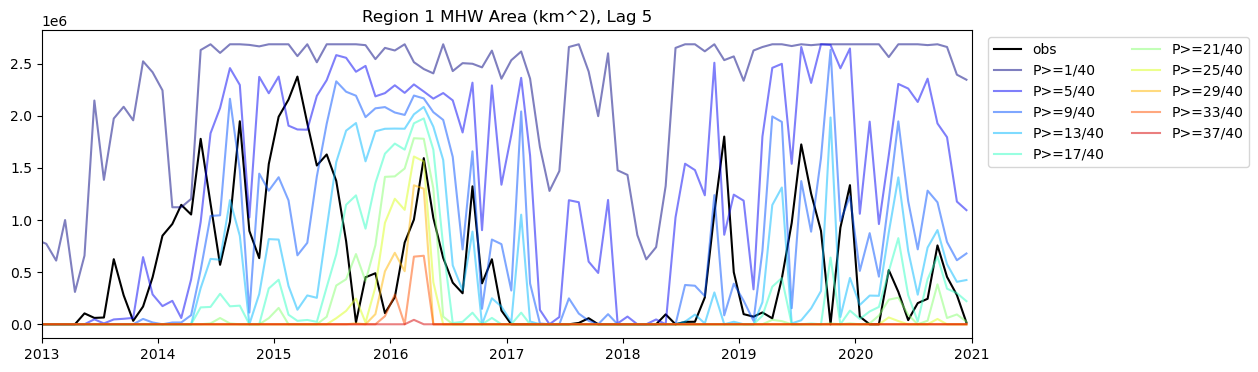

In [10]:
for lag in range(0,6):
    fig,ax=plt.subplots(1,1,figsize=(12,4))
    ax.plot(dates,dfA.A1_obs,'k-',label='obs')
    for ii in range(1,41,4):
        ax.plot(dates,dfA[f'A1_lag{lag}_gt{ii}'],color=colors[ii-1],alpha=.5,label=f'P>={ii}/40')
    ax.set_title(f'Region 1 MHW Area (km^2), Lag {lag}')
    ax.legend(ncols=2,bbox_to_anchor=[1.01,1])
    ax.set_xlim((dt.datetime(2013,1,1),dt.datetime(2021,1,1)))
    fig.savefig(f'figs/MHWAreaByPThresh_NPacRegion1_lag{lag}.png',bbox_inches='tight')

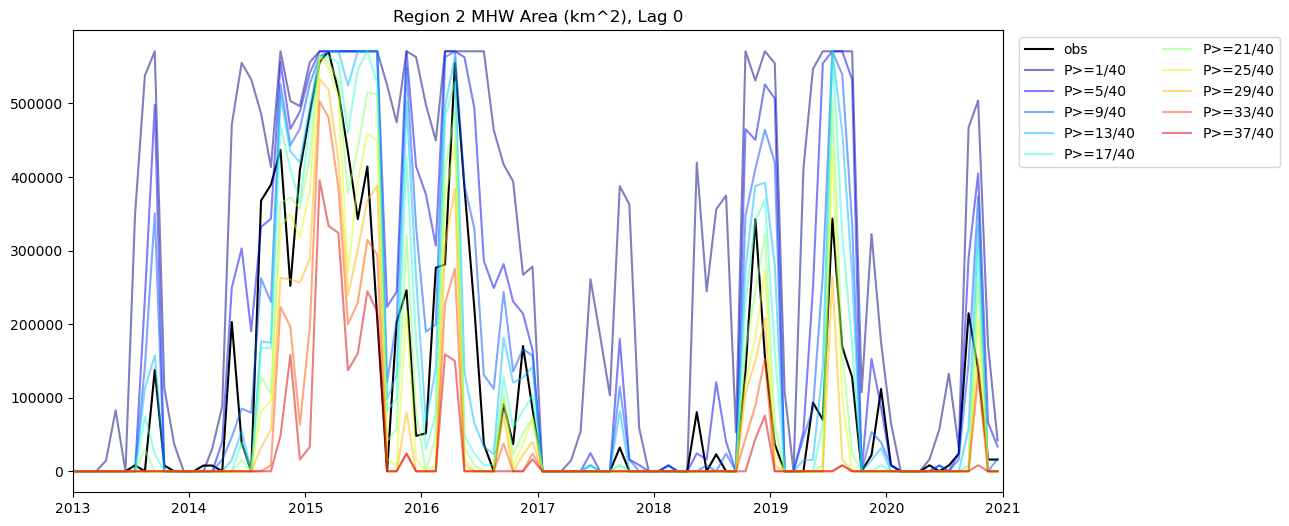

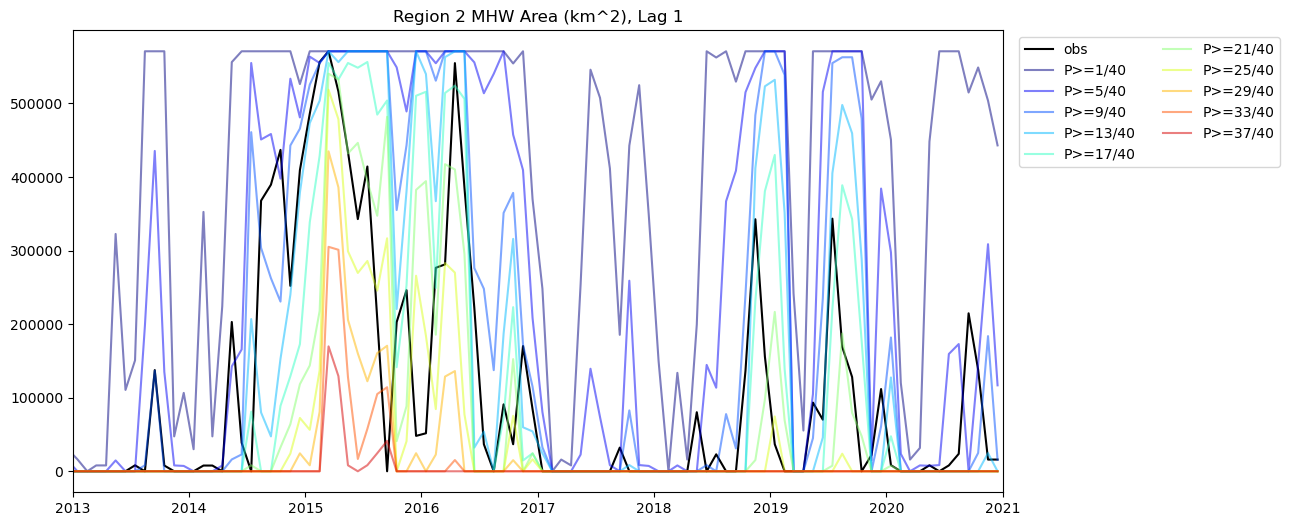

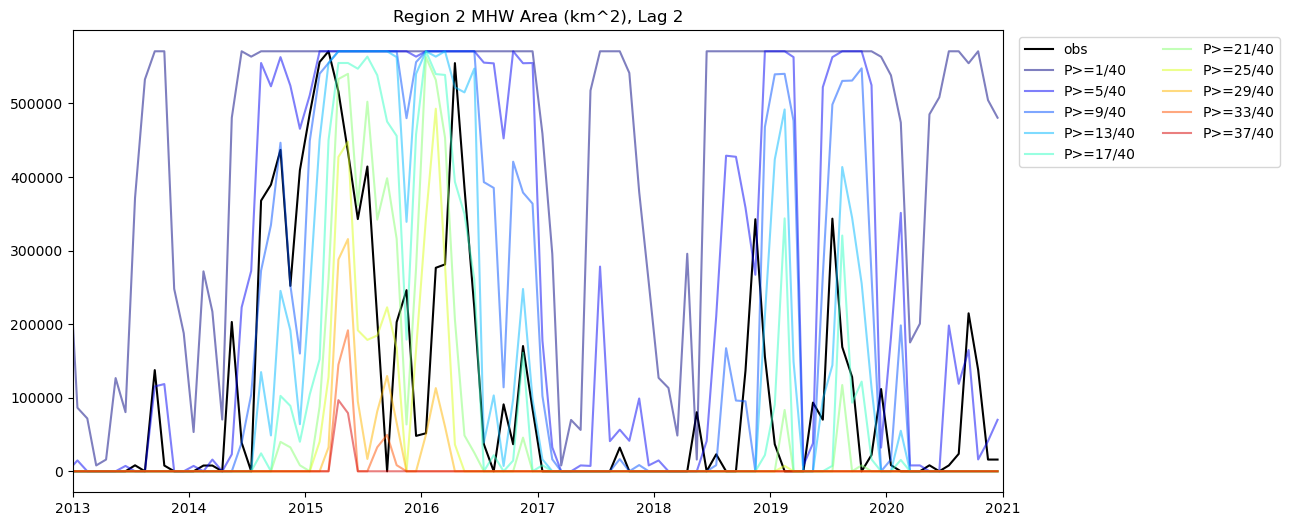

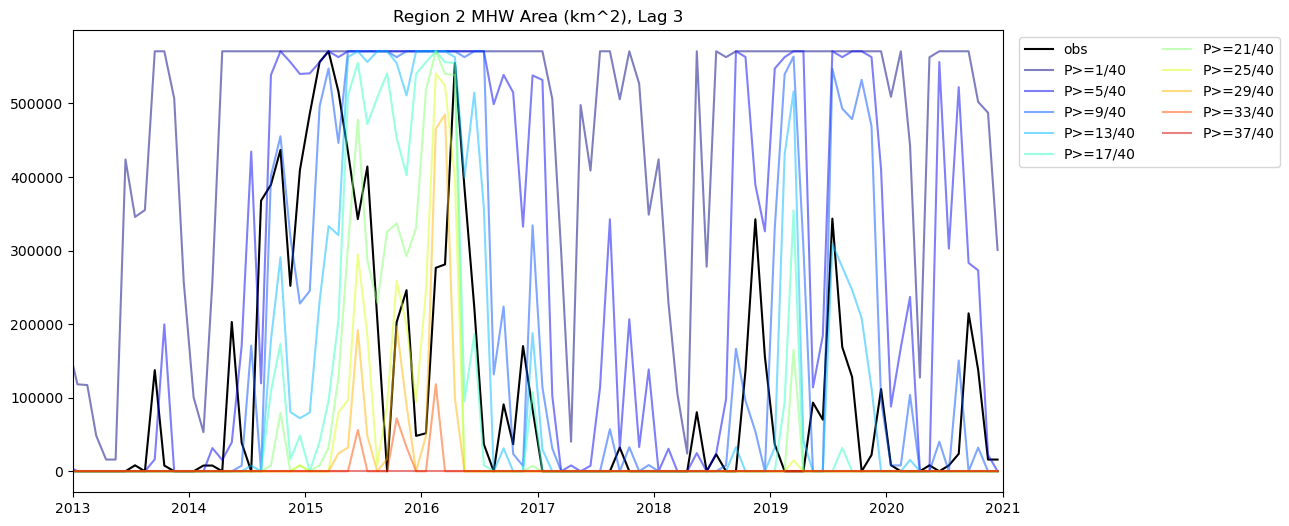

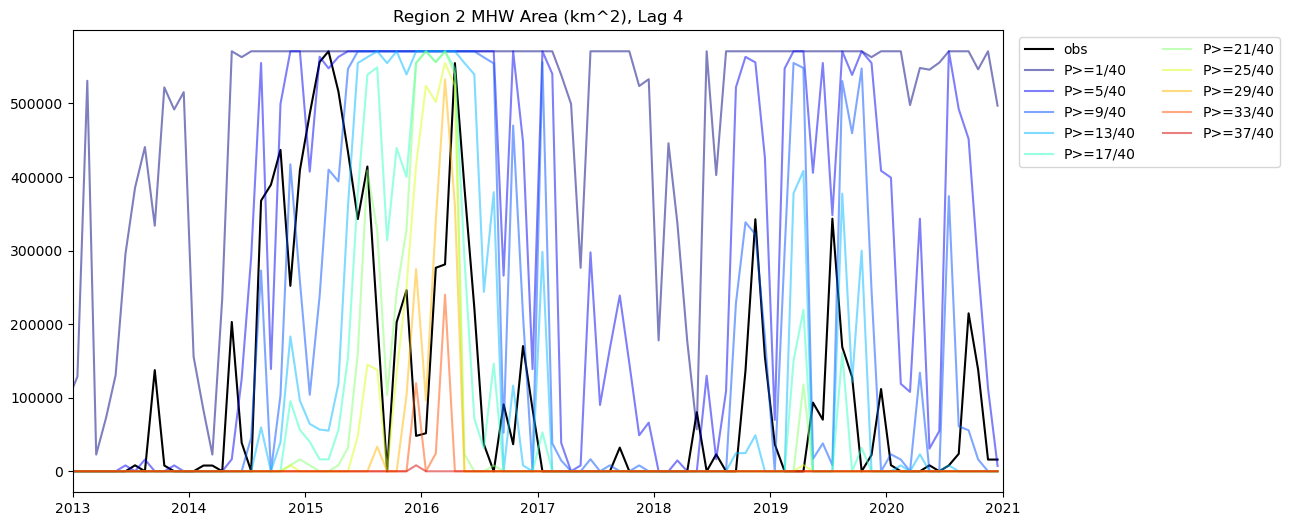

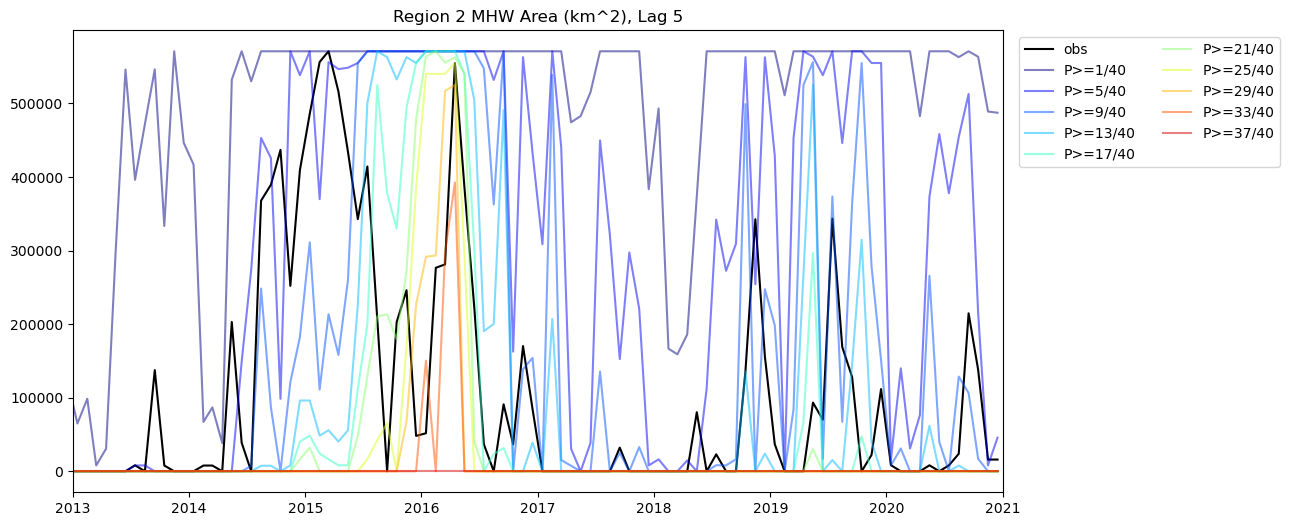

In [11]:
for lag in range(0,6):
    fig,ax=plt.subplots(1,1,figsize=(12,6))
    ax.plot(dates,dfA.A2_obs,'k-',label='obs')
    for ii in range(1,41,4):
        ax.plot(dates,dfA[f'A2_lag{lag}_gt{ii}'],color=colors[ii-1],alpha=.5,label=f'P>={ii}/40')
    ax.set_title(f'Region 2 MHW Area (km^2), Lag {lag}')
    ax.legend(ncols=2,bbox_to_anchor=[1.01,1])
    ax.set_xlim((dt.datetime(2013,1,1),dt.datetime(2021,1,1)))
    fig.savefig(f'figs/MHWAreaByPThresh_NPacRegion2_lag{lag}.png',bbox_inches='tight')